In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import nltk
from nltk.stem import PorterStemmer
nltk.download('wordnet')
from es_lemmatizer import lemmatize
from stop_words import get_stop_words
from nltk.corpus import stopwords
from spacy_spanish_lemmatizer import SpacyCustomLemmatizer
import re
nltk.download('stopwords')
from PIL import features
from wordcloud import WordCloud
nltk.download('punkt')
from textblob import TextBlob
from googletrans import Translator
from sentiment_analysis_spanish import sentiment_analysis
import goslate
import concurrent.futures


[nltk_data] Downloading package wordnet to C:\Users\Rafa
[nltk_data]     OpSeeker\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Rafa
[nltk_data]     OpSeeker\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Rafa
[nltk_data]     OpSeeker\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
data=pd.read_csv('output/clean_data.csv',error_bad_lines=False)
data=data.drop(['Unnamed: 0'],axis=1)
data.size


23032

In [4]:
list_keywords = ["Pedro Sánchez", "Psoe","PSOE", "Partido Socialista", 
                 "Santiago Abascal", "Abascal", "Vox", "VOX",
                 "Pablo Iglesias", "Podemos", "Unidas Podemos",
                 "Pablo Casado", "PP", "Partido Popular","Inés Arrimadas", 
                 "Arrimadas", "Ciudadanos", "Cs"]#normaliz

def isPoliticArticle(text):
        if any(word in text for word in list_keywords):
            return 1
        else:
            return 0

In [5]:
data['text'] = data['text'].astype(str)
data['isPoliticalArticle'] = data["text"].apply(isPoliticArticle)

In [6]:
data.head()

,title,text,authors,journal,isPoliticalArticle
0,Últimas noticias del coronavirus en directo ...,Nota a los lectores EL PAÍS ofrece en abierto...,"['El País', 'Cati Cladera', 'Efe', 'Vídeo']",elpais,0
1,Bruselas podrá exigir la venta de parte de su ...,Bruselas ha colocado este martes las bases de ...,"['Lluís Pellicer', 'Pool']",elpais,0
2,El Gobierno del Reino Unido impondrá multas mi...,El Gobierno del Reino Unido ha anunciado final...,"['Rafa De Miguel', 'Andy Rain']",elpais,0
3,¿Y si Canarias fuera la fuente de tierras rara...,“Canarias no es solo turismo de sol y playa n...,"['Guillermo Vega', 'Kate Passileggeri', 'Eyeem']",elpais,0
4,Pornhub borra dos tercios de los vídeos de su ...,Pornhub cede a las presiones y borra los vídeo...,"['Jaime Porras Ferreyra', 'Getty Images', 'M. ...",elpais,0


In [7]:
df = data.drop(data[data.isPoliticalArticle == 0].index)

In [8]:
df.isPoliticalArticle.value_counts()

1    938
Name: isPoliticalArticle, dtype: int64

In [9]:
df

,title,text,authors,journal,isPoliticalArticle
31,La llamada de Sánchez a Casado no logra desblo...,El bloqueo en la renovación del Consejo Genera...,"['Carlos E. Cué', 'Elsa García De Blas', 'Edua...",elpais,1
35,Trabajo descarta congelar el SMI pero el debat...,El Ministerio de Trabajo ha dejado claro este...,"['Manuel V. Gómez', 'Carlos E. Cué', 'Andrea C...",elpais,1
37,Unidas Podemos acusa a la ministra Teresa Ribe...,Nuevo choque entre las dos almas del Gobierno ...,"['Inés Santaeulalia', 'Óscar J.Barroso', 'Euro...",elpais,1
38,Un Constitucional fracturado concluye que inci...,El Tribunal Constitucional ha fallado este lun...,"['José María Brunet', 'Pau Barrena', 'Afp']",elpais,1
39,El exjefe de la Policía afirma que Fernández D...,Jorge Fernández Díaz exministro del Interior ...,"['J. J. Gálvez', 'Óscar López-Fonseca', 'Juan ...",elpais,1
...,...,...,...,...,...
5598,Nuevas restricciones por Navidad en Euskadi La...,Nuevas restricciones por Navidad en Euskadi La...,"['Borja Agudo', 'El Correo']",elcorreo,1
5599,Caso Bateragune Otegi dice que el Supremo busc...,Caso Bateragune Otegi dice que el Supremo busc...,['David Guadilla'],elcorreo,1
5622,de descuento en sesiones de Body Esculptor ...,¿QUÉ TE OFRECEMOS \n\nRPS \n\nMultiestética B...,[],elcorreo,1
5630,cosas a tener en cuenta para comprar juguetes,Antes de contarte qué criterios puedes seguir ...,[],elcorreo,1


Text(0, 0.5, 'Count')

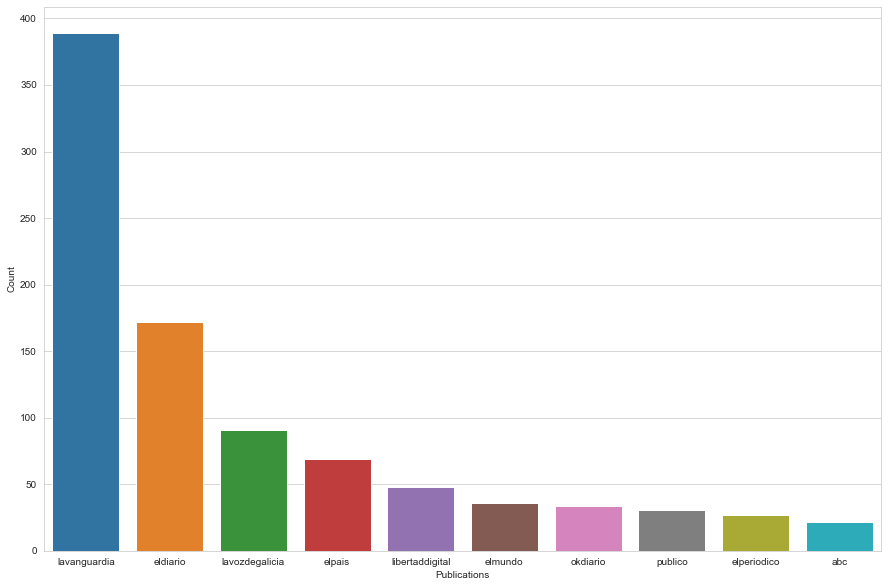

In [10]:
political_articles_per_journal=df.groupby(by=['journal'],as_index=False).count().sort_values(by='title',ascending=False).head(10)

plt.figure(figsize=(15,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=political_articles_per_journal['journal'],y=political_articles_per_journal['title'], data=political_articles_per_journal)
plt.xlabel("Publications")
plt.ylabel("Count")

In [11]:
#Aplicamos técnicas de Text Normalization

In [12]:
list_keywords_psoe_sanchez= ["Sánchez", "Pedro Sánchez", "Psoe", "Partido Socialista"]
list_keywords_vox_abascal= ['Santiago Abascal', "Abascal", "Vox"]
list_keywords_podemos_iglesias= ['Pablo Iglesias', 'Iglesias', "Podemos", "Unidas Podemos"]
list_keywords_pp_casado= ['Pablo Casado', 'Casado', "PP", "Partido Popular"]
list_keywords_ciudadanos_ines= ['Inés Arrimadas', 'Arrimadas', "Ciudadanos", "Cs"]

In [21]:
def probPolitical(text):
    isSanchez = 0
    isCasado = 0 
    isArrimadas = 0
    isAbascal = 0
    isIglesias = 0

    if any(word in text for word in list_keywords_psoe_sanchez):
        isSanchez += 1 
    if any(word in text for word in list_keywords_vox_abascal):
         isAbascal += 1 
    if any(word in text for word in list_keywords_podemos_iglesias):
         isIglesias += 1 
    if any(word in text for word in list_keywords_pp_casado):
        isCasado += 1 
    if any(word in text for word in list_keywords_ciudadanos_ines):
        isArrimadas += 1 

    total = isSanchez + isCasado + isArrimadas + isAbascal + isIglesias

    if (total > 0):
        return isAbascal/total #cambiar politico
    else:
        return 0
    

In [14]:
df['isIglesias'] = df["text"].apply(probPolitical)

In [16]:
df['isSanchez'] = df["text"].apply(probPolitical)

In [18]:
df['isCasado'] = df["text"].apply(probPolitical)

In [20]:
df['isArrimadas'] = df["text"].apply(probPolitical)

In [22]:
df['isAbascal'] = df["text"].apply(probPolitical)

In [23]:
df.head()

,title,text,authors,journal,isPoliticalArticle,isIglesias,isSanchez,isCasado,isArrimadas,isAbascal
31,La llamada de Sánchez a Casado no logra desblo...,El bloqueo en la renovación del Consejo Genera...,"['Carlos E. Cué', 'Elsa García De Blas', 'Edua...",elpais,1,0.25,0.25,0.25,0.0,0.25
35,Trabajo descarta congelar el SMI pero el debat...,El Ministerio de Trabajo ha dejado claro este...,"['Manuel V. Gómez', 'Carlos E. Cué', 'Andrea C...",elpais,1,1.00,0.00,0.00,0.0,0.00
37,Unidas Podemos acusa a la ministra Teresa Ribe...,Nuevo choque entre las dos almas del Gobierno ...,"['Inés Santaeulalia', 'Óscar J.Barroso', 'Euro...",elpais,1,1.00,0.00,0.00,0.0,0.00
38,Un Constitucional fracturado concluye que inci...,El Tribunal Constitucional ha fallado este lun...,"['José María Brunet', 'Pau Barrena', 'Afp']",elpais,1,0.00,0.00,1.00,0.0,0.00
39,El exjefe de la Policía afirma que Fernández D...,Jorge Fernández Díaz exministro del Interior ...,"['J. J. Gálvez', 'Óscar López-Fonseca', 'Juan ...",elpais,1,0.00,0.00,1.00,0.0,0.00


In [24]:
def getSentiment(text):
    sentiment = sentiment_analysis.SentimentAnalysisSpanish()
    return sentiment.sentiment(text)

In [25]:
df['sentiment'] = df["title"].apply(getSentiment)


In [27]:
df.head()

,title,text,authors,journal,isPoliticalArticle,isIglesias,isSanchez,isCasado,isArrimadas,isAbascal,sentiment
31,La llamada de Sánchez a Casado no logra desblo...,El bloqueo en la renovación del Consejo Genera...,"['Carlos E. Cué', 'Elsa García De Blas', 'Edua...",elpais,1,0.25,0.25,0.25,0.0,0.25,0.503993
35,Trabajo descarta congelar el SMI pero el debat...,El Ministerio de Trabajo ha dejado claro este...,"['Manuel V. Gómez', 'Carlos E. Cué', 'Andrea C...",elpais,1,1.00,0.00,0.00,0.0,0.00,0.007723
37,Unidas Podemos acusa a la ministra Teresa Ribe...,Nuevo choque entre las dos almas del Gobierno ...,"['Inés Santaeulalia', 'Óscar J.Barroso', 'Euro...",elpais,1,1.00,0.00,0.00,0.0,0.00,0.021402
38,Un Constitucional fracturado concluye que inci...,El Tribunal Constitucional ha fallado este lun...,"['José María Brunet', 'Pau Barrena', 'Afp']",elpais,1,0.00,0.00,1.00,0.0,0.00,0.044900
39,El exjefe de la Policía afirma que Fernández D...,Jorge Fernández Díaz exministro del Interior ...,"['J. J. Gálvez', 'Óscar López-Fonseca', 'Juan ...",elpais,1,0.00,0.00,1.00,0.0,0.00,0.000104


In [26]:
data_casado = df[df.isCasado == 1]

In [31]:
data_sanchez = df[df.isSanchez == 1]

In [57]:
data_iglesias = df[df.isIglesias == 1]

[Text(0, 0, 'elpais'),
 Text(0, 0, 'okdiario'),
 Text(0, 0, 'eldiario'),
 Text(0, 0, 'elmundo'),
 Text(0, 0, 'lavanguardia'),
 Text(0, 0, 'libertaddigital'),
 Text(0, 0, 'publico'),
 Text(0, 0, 'abc'),
 Text(0, 0, '20minutos'),
 Text(0, 0, 'elperiodico'),
 Text(0, 0, 'lavozdegalicia'),
 Text(0, 0, 'elcorreo')]

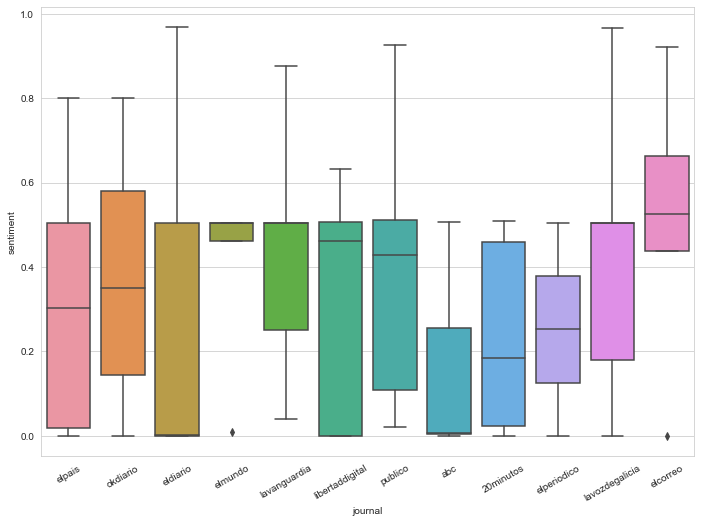

In [59]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax =sns.boxplot(x='journal', y='sentiment', data=df[df.isIglesias == 1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

In [56]:
data_iglesias.groupby(['journal'])['sentiment'].mean().sort_values(ascending=False)

journal
elcorreo           0.509857
lavanguardia       0.417515
elmundo            0.397453
lavozdegalicia     0.389753
publico            0.383836
okdiario           0.374997
libertaddigital    0.321272
elpais             0.287248
eldiario           0.253698
elperiodico        0.252309
20minutos          0.232951
abc                0.171052
Name: sentiment, dtype: float64

In [32]:
data_sanchez.groupby(['journal'])['sentiment'].mean().sort_values(ascending=False)

journal
elmundo            0.666308
publico            0.607147
lavozdegalicia     0.565592
elperiodico        0.488984
lavanguardia       0.485515
elpais             0.431014
abc                0.428272
libertaddigital    0.274051
eldiario           0.076561
okdiario           0.075113
Name: sentiment, dtype: float64

In [27]:
data_casado.groupby(['journal'])['sentiment'].mean().sort_values(ascending=False)


elmundo            0.287338
20minutos          0.280617
elperiodico        0.262009
lavozdegalicia     0.249650
elpais             0.201967
lavanguardia       0.158155
libertaddigital    0.153737
okdiario           0.142170
eldiario           0.136549
abc                0.121655
publico            0.112330
elcorreo           0.002067

journal
elmundo            0.539491
lavanguardia       0.430356
elperiodico        0.383735
eldiario           0.298728
lavozdegalicia     0.291511
elpais             0.286397
20minutos          0.254069
abc                0.253572
libertaddigital    0.213977
okdiario           0.201879
publico            0.193913
Name: sentiment, dtype: float64

[Text(0, 0, 'elpais'),
 Text(0, 0, 'okdiario'),
 Text(0, 0, 'eldiario'),
 Text(0, 0, 'elmundo'),
 Text(0, 0, 'lavanguardia'),
 Text(0, 0, 'libertaddigital'),
 Text(0, 0, 'publico'),
 Text(0, 0, 'abc'),
 Text(0, 0, '20minutos'),
 Text(0, 0, 'elperiodico'),
 Text(0, 0, 'lavozdegalicia')]

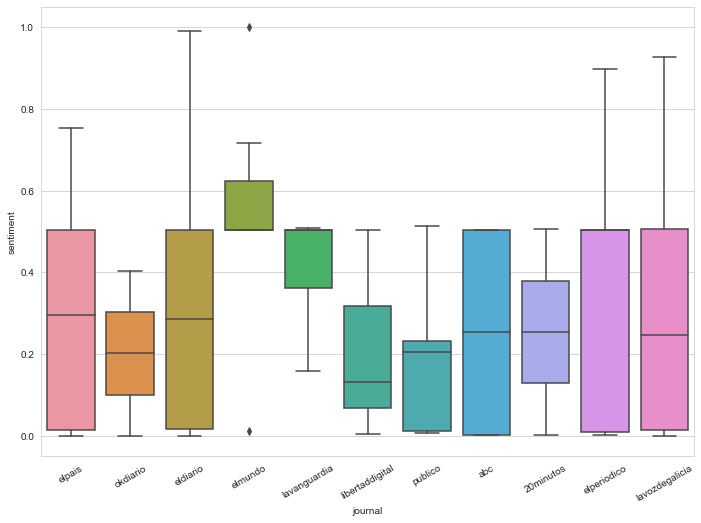

In [29]:

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

ax =sns.boxplot(x='journal', y='sentiment', data=df[df.isCasado == 1])
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)


[Text(0, 0, 'elpais'),
 Text(0, 0, 'okdiario'),
 Text(0, 0, 'eldiario'),
 Text(0, 0, 'elmundo'),
 Text(0, 0, 'lavanguardia'),
 Text(0, 0, 'libertaddigital'),
 Text(0, 0, 'publico'),
 Text(0, 0, 'abc'),
 Text(0, 0, 'elperiodico'),
 Text(0, 0, 'lavozdegalicia')]

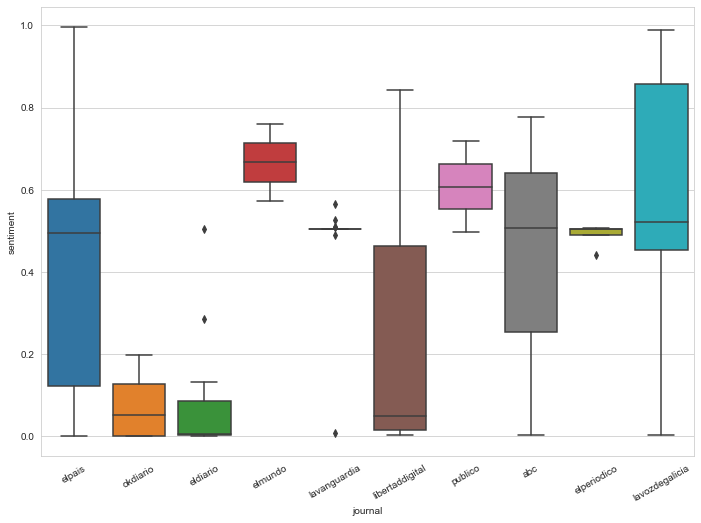

In [29]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ic = sns.boxplot(x='journal', y='sentiment', data=df[df.isSanchez == 1])
ic.set_xticklabels(ic.get_xticklabels(),rotation=30)

In [30]:
(df.isCasado == 1).sum()

104

In [31]:
df.groupby(['journal', 'isIglesias'])['sentiment'].mean()

journal          isIglesias
20minutos        0.000000      0.498366
                 0.333333      0.560707
                 1.000000      0.232951
abc              0.000000      0.269224
                 0.250000      0.101803
                 0.333333      0.010553
                 0.500000      0.252494
                 1.000000      0.171052
elcorreo         0.200000      0.010333
                 1.000000      0.509857
eldiario         0.000000      0.239380
                 0.200000      0.209274
                 0.250000      0.333161
                 0.333333      0.249693
                 0.500000      0.262419
                 1.000000      0.253698
elmundo          0.000000      0.507277
                 0.250000      0.507658
                 0.333333      0.502730
                 0.500000      0.297095
                 1.000000      0.397453
elpais           0.000000      0.330191
                 0.200000      0.261175
                 0.250000      0.278864
            

In [33]:
df_clustering = df.copy()
df_clustering.head()

,title,text,authors,journal,isPoliticalArticle,isIglesias,isSanchez,isCasado,isArrimadas,isAbascal,sentiment
31,La llamada de Sánchez a Casado no logra desblo...,El bloqueo en la renovación del Consejo Genera...,"['Carlos E. Cué', 'Elsa García De Blas', 'Edua...",elpais,1,0.25,0.25,0.25,0.0,0.25,0.503993
35,Trabajo descarta congelar el SMI pero el debat...,El Ministerio de Trabajo ha dejado claro este...,"['Manuel V. Gómez', 'Carlos E. Cué', 'Andrea C...",elpais,1,1.00,0.00,0.00,0.0,0.00,0.007723
37,Unidas Podemos acusa a la ministra Teresa Ribe...,Nuevo choque entre las dos almas del Gobierno ...,"['Inés Santaeulalia', 'Óscar J.Barroso', 'Euro...",elpais,1,1.00,0.00,0.00,0.0,0.00,0.021402
38,Un Constitucional fracturado concluye que inci...,El Tribunal Constitucional ha fallado este lun...,"['José María Brunet', 'Pau Barrena', 'Afp']",elpais,1,0.00,0.00,1.00,0.0,0.00,0.044900
39,El exjefe de la Policía afirma que Fernández D...,Jorge Fernández Díaz exministro del Interior ...,"['J. J. Gálvez', 'Óscar López-Fonseca', 'Juan ...",elpais,1,0.00,0.00,1.00,0.0,0.00,0.000104


In [34]:
df_clustering = df_clustering.replace(0,np.nan)

In [35]:
df_clustering['sentiment_isAbascal'] = df_clustering['isAbascal']*df_clustering['sentiment']
df_clustering['sentiment_isSanchez'] = df_clustering['isSanchez']*df_clustering['sentiment']
df_clustering['sentiment_isCasado'] = df_clustering['isCasado']*df_clustering['sentiment']
df_clustering['sentiment_isIglesias'] = df_clustering['isIglesias']*df_clustering['sentiment']
df_clustering['sentiment_isArrimadas'] = df_clustering['isArrimadas']*df_clustering['sentiment']




In [36]:
df_clustering.head()

,title,text,authors,journal,isPoliticalArticle,isIglesias,isSanchez,isCasado,isArrimadas,isAbascal,sentiment,sentiment_isAbascal,sentiment_isSanchez,sentiment_isCasado,sentiment_isIglesias,sentiment_isArrimadas
31,La llamada de Sánchez a Casado no logra desblo...,El bloqueo en la renovación del Consejo Genera...,"['Carlos E. Cué', 'Elsa García De Blas', 'Edua...",elpais,1,0.25,0.25,0.25,NaN,0.25,0.503993,0.125998,0.125998,0.125998,0.125998,NaN
35,Trabajo descarta congelar el SMI pero el debat...,El Ministerio de Trabajo ha dejado claro este...,"['Manuel V. Gómez', 'Carlos E. Cué', 'Andrea C...",elpais,1,1.00,NaN,NaN,NaN,NaN,0.007723,NaN,NaN,NaN,0.007723,NaN
37,Unidas Podemos acusa a la ministra Teresa Ribe...,Nuevo choque entre las dos almas del Gobierno ...,"['Inés Santaeulalia', 'Óscar J.Barroso', 'Euro...",elpais,1,1.00,NaN,NaN,NaN,NaN,0.021402,NaN,NaN,NaN,0.021402,NaN
38,Un Constitucional fracturado concluye que inci...,El Tribunal Constitucional ha fallado este lun...,"['José María Brunet', 'Pau Barrena', 'Afp']",elpais,1,NaN,NaN,1.00,NaN,NaN,0.044900,NaN,NaN,0.044900,NaN,NaN
39,El exjefe de la Policía afirma que Fernández D...,Jorge Fernández Díaz exministro del Interior ...,"['J. J. Gálvez', 'Óscar López-Fonseca', 'Juan ...",elpais,1,NaN,NaN,1.00,NaN,NaN,0.000104,NaN,NaN,0.000104,NaN,NaN


In [37]:
df_clustering.columns

Index(['title', 'text', 'authors', 'journal', 'isPoliticalArticle',
       'isIglesias', 'isSanchez', 'isCasado', 'isArrimadas', 'isAbascal',
       'sentiment', 'sentiment_isAbascal', 'sentiment_isSanchez',
       'sentiment_isCasado', 'sentiment_isIglesias', 'sentiment_isArrimadas'],
      dtype='object')

In [38]:
df_clustering = df_clustering[['journal', 'sentiment_isAbascal', 'sentiment_isSanchez',
       'sentiment_isCasado', 'sentiment_isIglesias', 'sentiment_isArrimadas', 'sentiment']]

In [39]:
df_aglomerative = df_clustering.groupby('journal').mean()

In [40]:
df_aglomerative

,sentiment_isAbascal,sentiment_isSanchez,sentiment_isCasado,sentiment_isIglesias,sentiment_isArrimadas,sentiment
journal,,,,,,
20minutos,0.345819,0.244332,0.280617,0.226373,0.499998,0.380662
abc,0.083478,0.184819,0.121655,0.089073,0.016483,0.211433
elcorreo,0.002067,0.002067,0.002067,0.425225,0.002067,0.426603
eldiario,0.104619,0.096236,0.136549,0.137929,0.108392,0.248804
elmundo,0.223053,0.230046,0.287338,0.212362,0.195541,0.462379
elpais,0.175720,0.207581,0.201967,0.215076,0.084121,0.300398
elperiodico,0.143220,0.266324,0.262009,0.178247,0.238911,0.395936
lavanguardia,0.127525,0.179173,0.158155,0.153977,0.142099,0.492910
lavozdegalicia,0.256390,0.335027,0.249650,0.286087,0.210112,0.378402


In [41]:
df_aglomerative.groupby(['journal'])['sentiment_isCasado'].mean().sort_values(ascending=False)

journal
elmundo            0.287338
20minutos          0.280617
elperiodico        0.262009
lavozdegalicia     0.249650
elpais             0.201967
lavanguardia       0.158155
libertaddigital    0.153737
okdiario           0.142170
eldiario           0.136549
abc                0.121655
publico            0.112330
elcorreo           0.002067
Name: sentiment_isCasado, dtype: float64

In [54]:
df_aglomerative.groupby(['journal'])['sentiment_isIglesias'].mean().sort_values(ascending=False)

journal
elcorreo           0.425225
lavozdegalicia     0.286087
okdiario           0.233034
20minutos          0.226373
publico            0.222040
elpais             0.215076
elmundo            0.212362
libertaddigital    0.186198
elperiodico        0.178247
lavanguardia       0.153977
eldiario           0.137929
abc                0.089073
Name: sentiment_isIglesias, dtype: float64

In [41]:
df_aglomerative.to_csv("output/df_aglomerative.csv")


In [40]:

df_aglomerative.T.corr()

journal,20minutos,abc,elcorreo,eldiario,elmundo,elpais,elperiodico,lavanguardia,lavozdegalicia,libertaddigital,okdiario,publico
journal,,,,,,,,,,,,
20minutos,1.000000,-0.437443,-0.196974,0.128316,0.095565,-0.485439,0.206870,0.174373,-0.353359,0.167772,0.178303,-0.440664
abc,-0.437443,1.000000,0.352532,0.579434,0.733794,0.884498,0.691971,0.709629,0.933059,0.675737,0.474612,0.820485
elcorreo,-0.196974,0.352532,1.000000,0.748765,0.535605,0.669668,0.352291,0.634152,0.584283,0.704656,0.779746,0.817847
eldiario,0.128316,0.579434,0.748765,1.000000,0.945516,0.762590,0.782192,0.945172,0.659905,0.935668,0.817719,0.754469
elmundo,0.095565,0.733794,0.535605,0.945516,1.000000,0.800546,0.858647,0.955081,0.723181,0.912838,0.696567,0.715782
elpais,-0.485439,0.884498,0.669668,0.762590,0.800546,1.000000,0.574595,0.758213,0.889955,0.749768,0.548658,0.934063
elperiodico,0.206870,0.691971,0.352291,0.782192,0.858647,0.574595,1.000000,0.875452,0.662908,0.824514,0.779897,0.590477
lavanguardia,0.174373,0.709629,0.634152,0.945172,0.955081,0.758213,0.875452,1.000000,0.791570,0.990491,0.846309,0.771843
lavozdegalicia,-0.353359,0.933059,0.584283,0.659905,0.723181,0.889955,0.662908,0.791570,1.000000,0.804435,0.665456,0.927799


In [122]:
#clustering
from sklearn.decomposition import PCA 
from sklearn.cluster import AgglomerativeClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.metrics import silhouette_score 
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram


In [60]:
data = pd.read_csv('output/df_aglomerative.csv') 
X = data.drop('journal', axis = 1) 
y = data['journal']

In [61]:
pca_pipeline = make_pipeline(StandardScaler(), 
                             PCA(2))
pca_pipeline.fit(X)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [62]:
pca = pca_pipeline.named_steps['pca']
pca.explained_variance_ratio_

array([0.56964442, 0.24786885])

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


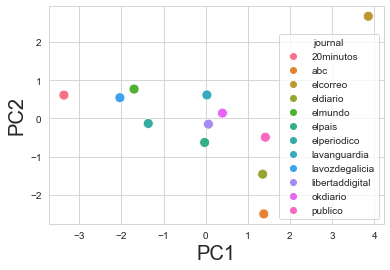

In [88]:
transformed_X = pca_pipeline.transform(X)
data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])

sns.scatterplot('PC1', 'PC2', data=data, hue=y, s= 100)
plt.xlabel('PC1', size=20)
plt.ylabel('PC2', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [65]:
loadings = pca.components_.T 
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2'], index=X.columns)
loading_matrix

,PC1,PC2
sentiment_isAbascal,-0.509895,0.041325
sentiment_isSanchez,-0.463900,-0.165863
sentiment_isCasado,-0.519744,-0.063557
sentiment_isIglesias,0.127037,0.699703
sentiment_isArrimadas,-0.463769,0.161609
sentiment,-0.153136,0.671595


C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


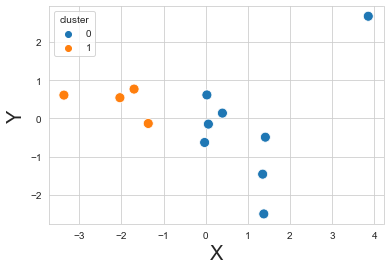

In [72]:
k_means = KMeans(n_clusters=2, 
                 random_state=0)

k_means.fit(X)

data = pd.DataFrame(transformed_X, columns=['PC1', 'PC2'])
data['journals'] = y
data['cluster'] = k_means.labels_

sns.scatterplot('PC1', 'PC2', data=data, s= 100, hue='cluster')
plt.xlabel('X', size=20)
plt.ylabel('Y', size=20)
# plt.scatter(data.PC1, data.PC2)
plt.show()

In [73]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, 
                                      model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

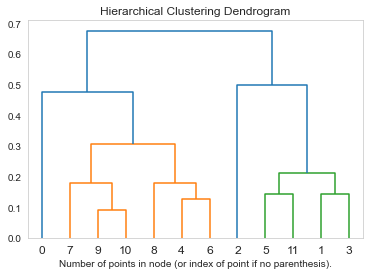

In [96]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, )
model = model.fit(X)
plt.title('Hierarchical Clustering Dendrogram')
plt.grid(b=None)
#plt.axis('off')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=5)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

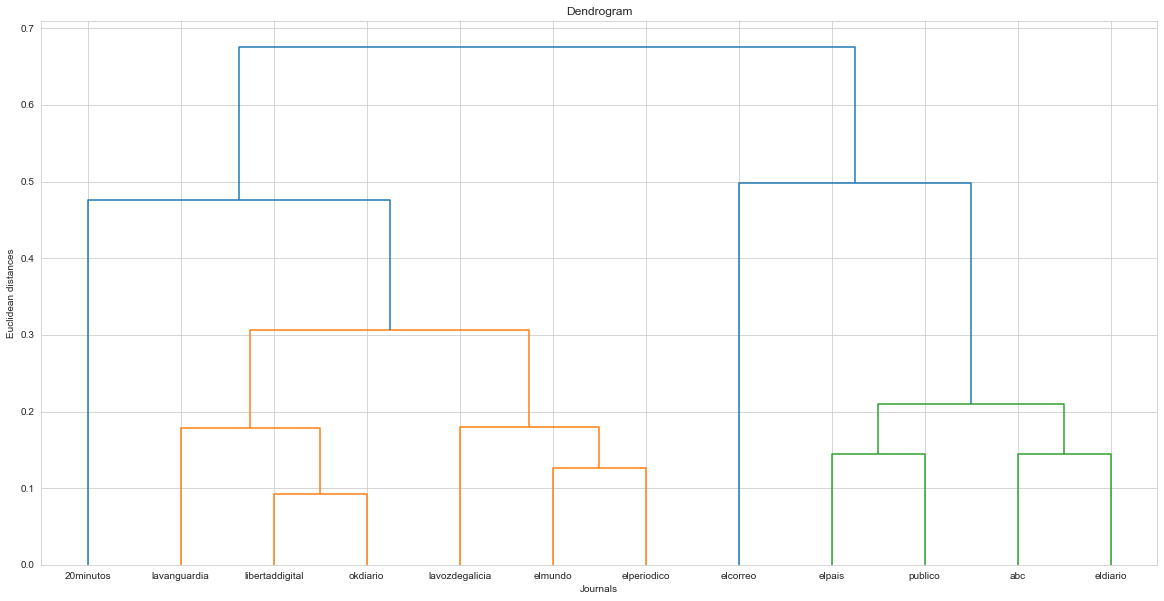

In [121]:

dend = dendrogram(linkage(X, method='ward'), 
           leaf_font_size=10,
           labels = y.tolist())

plt.rcParams["figure.figsize"] = (30,10)
plt.title('Dendrogram')
plt.xlabel('Journals')
plt.ylabel('Euclidean distances')
plt.show()
